# ML Regression`DRT` Startup File

Version  | Date | Author | Notes |
:-------:|:----:|:-------|:-----:|
0.1 |21 July 2023| Ken Dizon | Initial version

**Objective**

Write a startup ML script for Regression using `Regression Trees`, #DecisionTreeRegression to split our data into groups based on features, like in classification, and return a prediction that is the average across the data we have already seen. 

### Algorithms
Regression | 
:---------:|
ordinal, poisson, linear, polynomial, lasso, bayesian, NNR, decsion forest, KNNR |
______________________
#### Content
1. **Load data**
    * 1.1 Data Exploration
2. **Data Preprocessing**
    * 2.1 Cleaning
    * 2.2 Missing Data
    * 2.3 Scaling
3. **Split - Test & Train**
4. **Model Selection**
5. **Model Training**
5. **Model Evaluation**

### Libraries

In [1]:
try:
    import numpy as np #math library 
    import scipy #computation
    import matplotlib.pyplot as plt #visualization
    %matplotlib inline
    import pandas as pd #dataframes
    
    import sklearn # base algorithims
    from sklearn import preprocessing
    from sklearn.model_selection import train_test_split
    from sklearn import metrics 
    '''machine learning library'''
    from sklearn.tree import DecisionTreeRegressor #DTR
    import sklearn.tree as tree
    
    print('https://scikit-learn.org/stable/')
    print("Libraries imported successfully!")
except ImportError:
    print("Libraries not installed. Please install it to use this library.")

https://scikit-learn.org/stable/
Libraries imported successfully!


_________
# [1] Load Data

In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/real_estate_data.csv'

**Case Study**

Imagine you are a data scientist working for a real estate company that is planning to invest in Boston real estate. You have collected information about various areas of Boston and are tasked with created a model that can predict the median price of houses for that area so it can be used to make offers.

The dataset had information on areas/towns not individual houses, the features are:

Features | Attributes | 
:-------:|:----------:|
CRIM | Crime per capita |
ZN | Proportion of residential land zoned for lots over 25,000 sq.ft.|
INDUS | Proportion of non-retail business acres per town
CHAS | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
NOX | Nitric oxides concentration (parts per 10 million) |
RM | Average number of rooms per dwelling |
AGE |  Proportion of owner-occupied units built prior to 1940 |
DIS | Weighted distances to ﬁve Boston employment centers |
RAD | Index of accessibility to radial highways |
TAX | Full-value property-tax rate per 10,000 |
PTRAIO | Pupil-teacher ratio by town |
LSTAT | Percent lower status of the population |
MEDV | Median value of owner-occupied homes in $1000 |

In [3]:
# Load
try:
    df = pd.read_csv(filepath)
    print("Data imported successfully!")
except ImportError:
    print("Data not installed. Please Load Data.")
# take a look at the dataset
df.head()

Data imported successfully!


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


## 1.1 Data Exploration

In [4]:
df.shape

(506, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    486 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


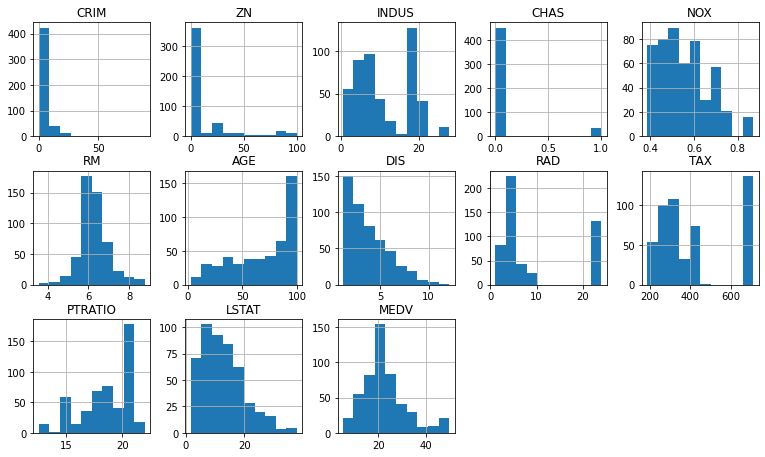

In [6]:
df.hist(layout=(5,5), figsize=(13, 13))
plt.show()

In [7]:
# Check null data
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

_____
# [2] Data Preprocessing 
**NOTE:** As this is already a refined dataset we skip steps
- Cleaning
- Missing data
- Scaling

In [8]:
# drop the rows with missing values because we have enough data in our dataset. 
# missing = 20
df.dropna(inplace=True)

In [9]:
# data null check
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
# Keep all data except for the assigned Target
X = df.drop(columns=["MEDV"])
Y = df["MEDV"] # Target/predict Feature

In [11]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21


In [12]:
# MEDV= Median value of owner-occupied homes in $1000
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

# [3] Creating train and test dataset


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=.2, # ratio of the testing dataset
                                                    random_state=1) # ensures that we obtain the same splits

_______
# [4] Model Selection

### Regression Trees 
The important parameters of `DecisionTreeRegressor` are:
- `criterion`: {"mse", "friedman_mse", "mae", "poisson"} - The function used to measure error

- `max_depth` - The max depth the tree can be

- `min_samples_split` - The minimum number of samples required to split a node

- `min_samples_leaf` - The minimum number of samples that a leaf can contain

- `max_features`: {"auto", "sqrt", "log2"} - The number of feature we examine looking for the best one, used to speed up training

In [14]:
# creating a DecisionTreeRegressor object, 
# setting the criterion parameter to mse for Mean Squared Error
regression_tree = DecisionTreeRegressor(criterion = "mse")

_______
# [5] Model Training

In [15]:
regression_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

____
# [6] Model Evaluation

In [16]:
# score method of the DecisionTreeRegressor object providing our testing data, 
# this number is the  𝑅2 value which indicates the coefficient of determination
regression_tree.score(X_test, Y_test)

0.8454764278961551

In [17]:
# find the average error in our testing set which is the average error in median home value prediction
prediction = regression_tree.predict(X_test)
print("$",(prediction - Y_test).abs().mean()*1000)

$ 2727.848101265823


<details><summary>Click here mae method</summary>

```python
regression_tree = DecisionTreeRegressor(criterion = "mae") #mean absoulte error
regression_tree.fit(X_train, Y_train) #model training

print(regression_tree.score(X_test, Y_test))

prediction = regression_tree.predict(X_test) # evaluation
print("$",(prediction - Y_test).abs().mean()*1000)
```
</details>

_____
# Visualize Decision Regression Tree

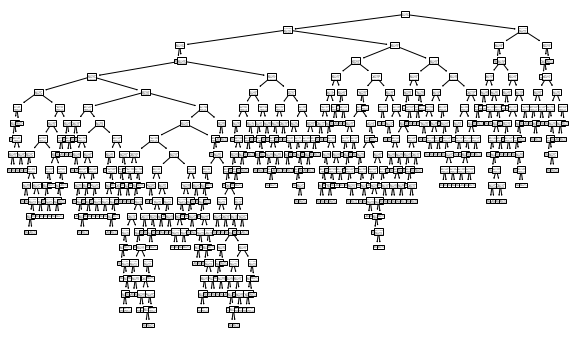

In [18]:
# Set the figure size
plt.figure(figsize=(10, 6)) 

tree.plot_tree(regression_tree)
plt.show()